Enter the ticker symbol (e.g., AAPL):  AAPL
Enter the start date (mm/dd/yyyy):  01/01/2000
Enter the investment amount (e.g., 10000):  10000
Enter the number of time intervals (days) for Monte Carlo simulation:  250
Enter the number of simulations for Monte Carlo simulation:  10000



Investment Amount: $10000.0
Latest Stock Price: $227.52
Volume of Shares You Can Hold: 43.95 shares


--------------------------------------------------------------------------------
                               Apple Inc. (AAPL)                                
--------------------------------------------------------------------------------


------------------- Key Financial Metrics -------------------

Metric                   Value                    Description
---------------------------------------------------------------------------
Market Cap               3,459,237,019,648.00     Total market value of a company’s outstanding shares
Enterprise Value         3,498,748,149,760.00     Company value including debt and excluding cash
Trailing P/E             34.68                    Price-to-Earnings ratio based on past 12 months earnings
Forward P/E              30.42                    Price-to-Earnings ratio based on future earnings estimates
PEG Ratio                3.06     

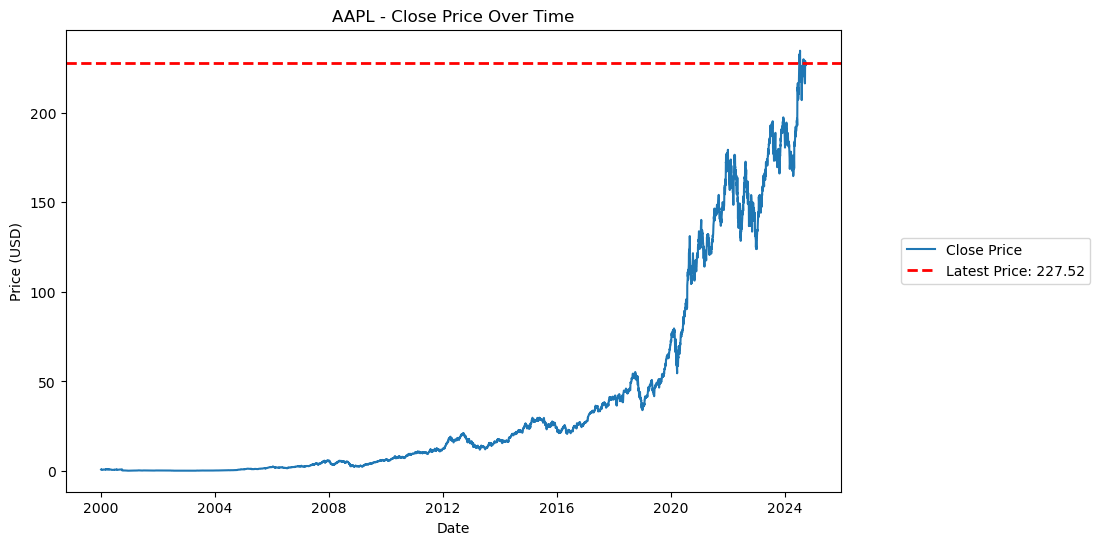


Explanation: The chart above shows the Close price of AAPL over time. It provides a historical view of the stock's price movement adjusted for corporate actions like dividends and splits if the 'Adj Close' is used. The dashed line represents the latest price of 227.52 USD.


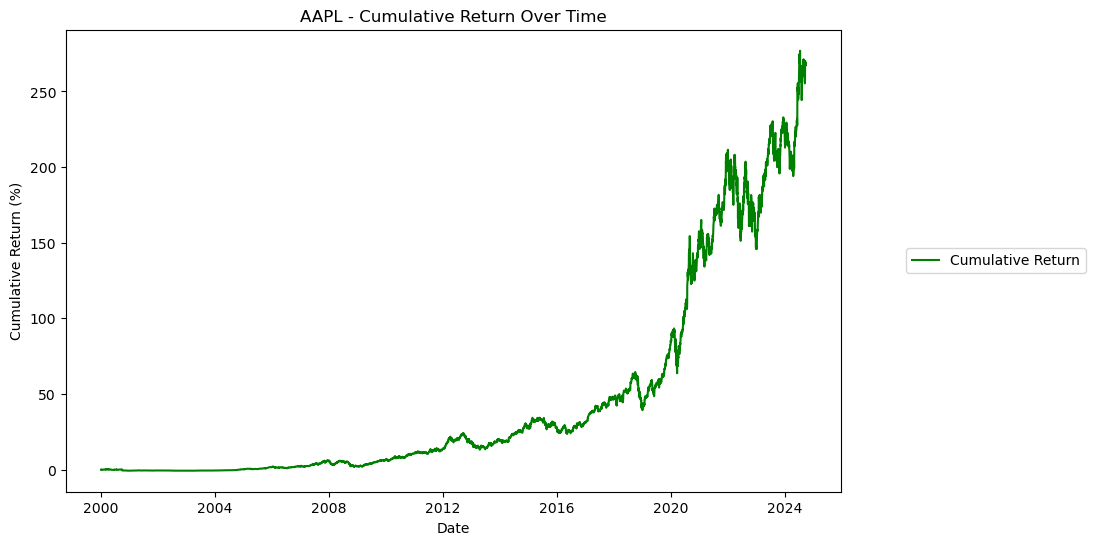


Explanation: The cumulative return shows how much a stock has gained or lost over the entire period starting from the first trading day in the dataset. A positive value indicates growth in the stock, while a negative value indicates a loss over the selected period.


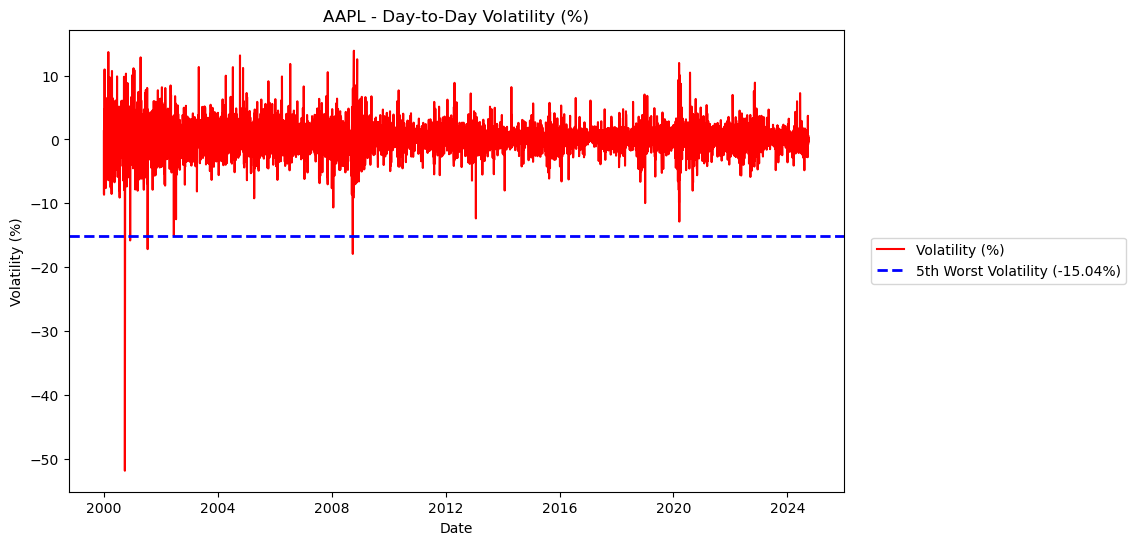


Explanation: The chart above shows the day-to-day percentage volatility of AAPL. The blue dashed line highlights the 5th worst volatility during the period, which is -15.04%. This helps investors assess the worst volatility (percentage change) experienced on one of the worst days.


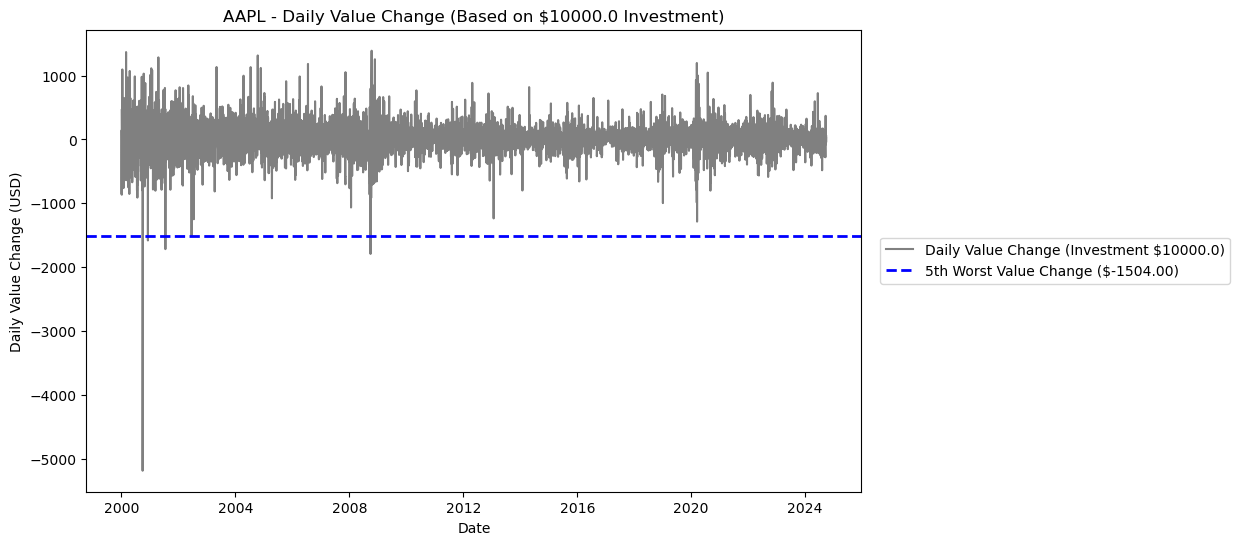

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Explanation: The chart above shows the day-to-day value change of AAPL based on an investment of $10000.0. The blue dashed line indicates the 5th worst value change during the period, which is $-1504.00. This is related to the concept of Value at Risk (VaR). VaR is a measure of how much value you could potentially lose on your investment in the worst-case scenario on a given day. In this case, the 5th worst value change means that there is a low probability (approximately 2% of the days in the dataset) that the investment could lose more than this amount in a single day.

In other words, this measure tells you that on the 5th worst day, the investment lost around $-1503.9999999999998. This is useful for understanding risk in terms of potential losses and how much you could lose on particularly bad days in the stock market.


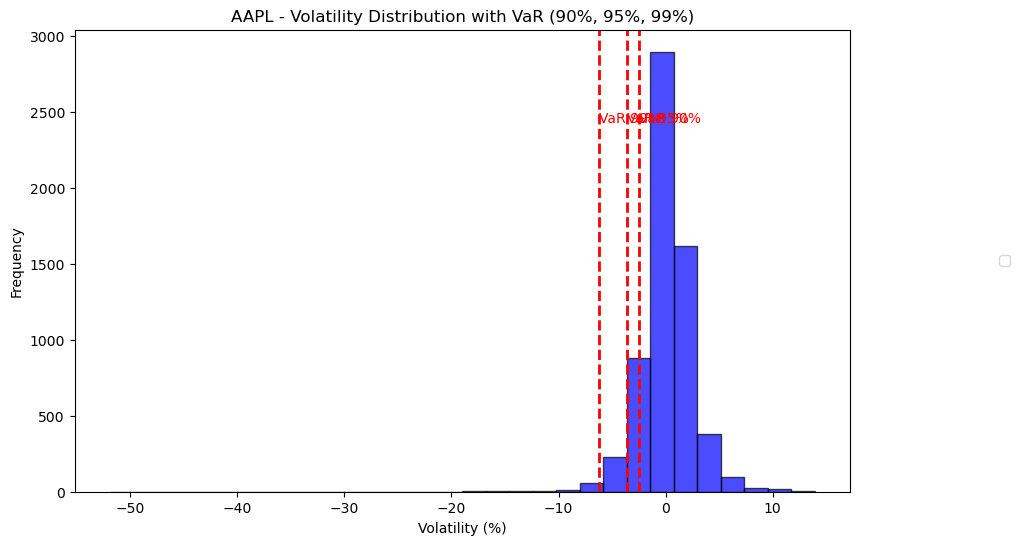


Explanation: The histogram represents the distribution of day-to-day volatility for AAPL. The red dashed lines indicate the Value at Risk (VaR) levels at 90%, 95%, and 99% confidence intervals. For example, at the 99% confidence level, there is a 1% chance the stock will experience a day with volatility worse than the corresponding VaR level.


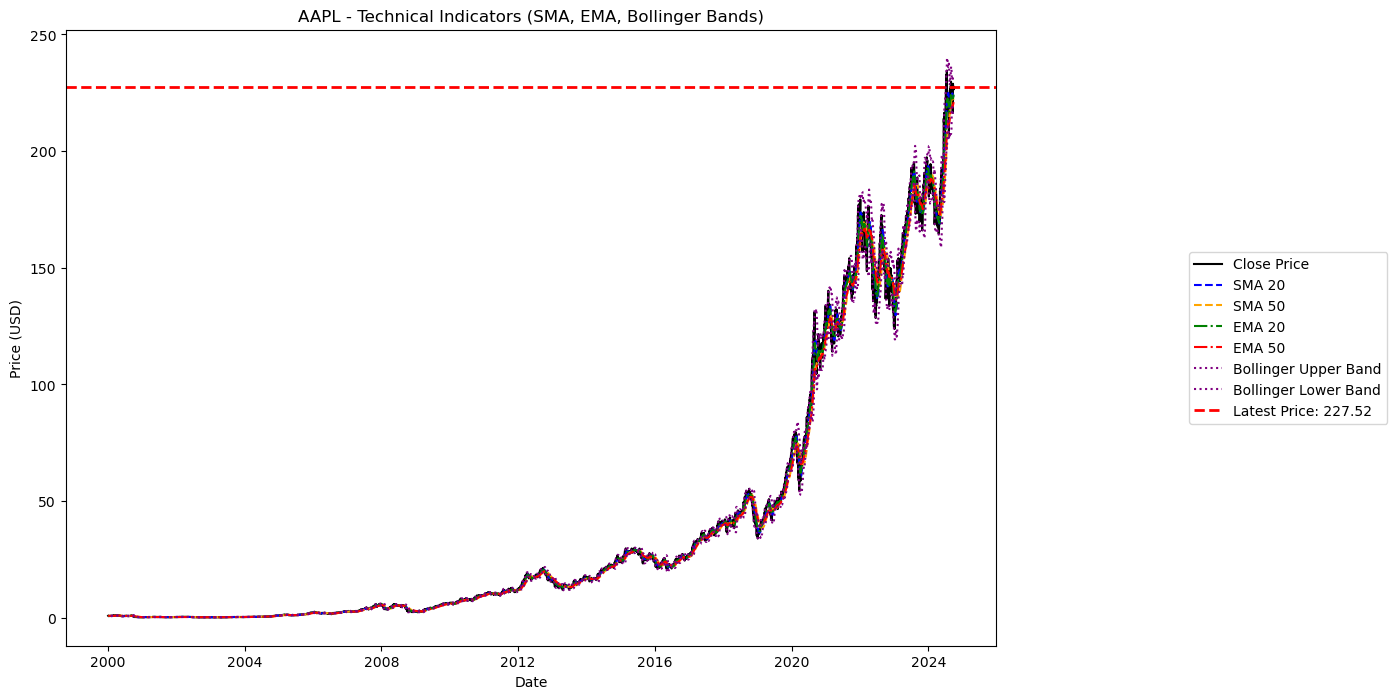


Explanation: The chart above shows key technical indicators for AAPL.
1. **Simple Moving Averages (SMA)**: The 20-day and 50-day SMAs smooth out price fluctuations and help reveal trends.
   - If the 20-day SMA crosses above the 50-day SMA, it signals potential upward momentum.
   - If the 20-day SMA crosses below the 50-day SMA, it indicates potential downward momentum.
2. **Exponential Moving Averages (EMA)**: The EMA is more responsive to recent price changes.
   - A rising EMA indicates that recent prices are trending higher.
3. **Bollinger Bands**: These show volatility by plotting two standard deviations above and below the 20-day SMA.
   - When the price touches the upper band, it might indicate that the stock is overbought, meaning it may fall.
   - When the price touches the lower band, it might indicate the stock is oversold, suggesting it may rise.



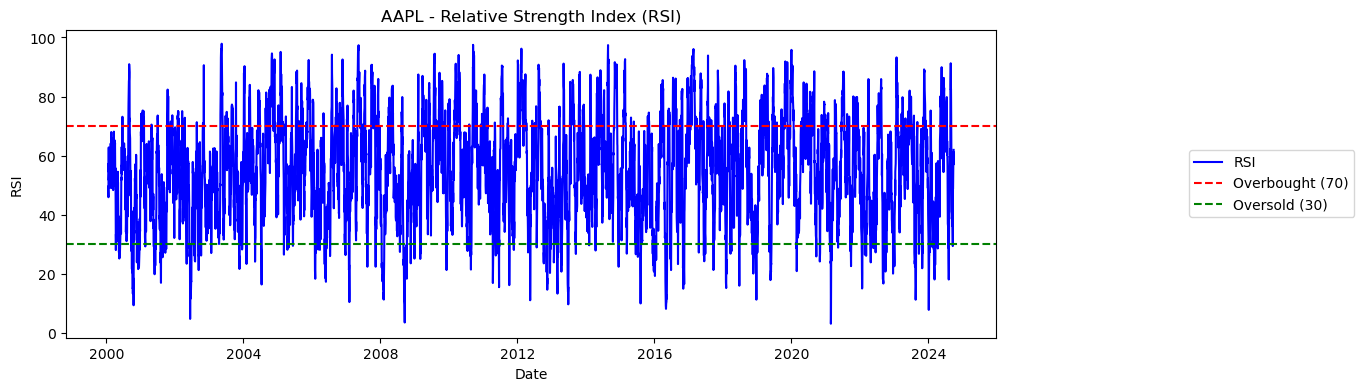


Explanation: The Relative Strength Index (RSI) is a momentum indicator used to identify overbought and oversold conditions for AAPL.
1. **RSI above 70**: This indicates that the stock might be overbought, meaning that it has risen too quickly and may be due for a correction.
2. **RSI below 30**: This suggests the stock might be oversold, meaning it has dropped too much and could bounce back soon.



Enter the interval number to highlight (between 0 and 249):  249



Running Monte Carlo simulation...



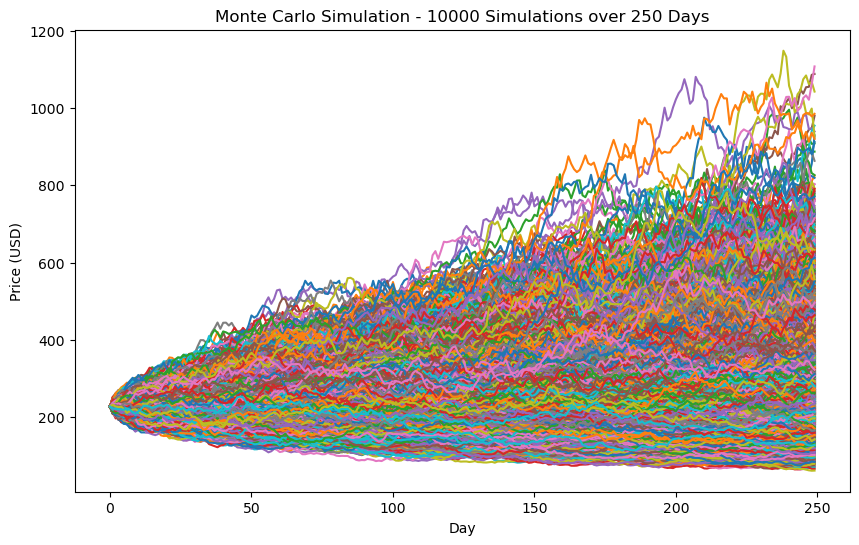

Worst Simulation $/share: 61.9
Avg Simulation $/share: 284.89
Best Simulation $/share: 1107.39

Expected Return after 250 days: 25.09%

Explanation: The Monte Carlo simulation estimates potential future stock prices based on historical log returns. The worst, average, and best simulated outcomes are displayed to give an idea of the possible range of stock prices for AAPL after 250 days.

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $167.27 and $402.52
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $49.64 and $520.15

Explanation: The confidence intervals (1 and 2 standard deviations) indicate the range within which we expect the stock price to fall with 68% and 95% confidence, respectively. These intervals help gauge the risk of price changes.


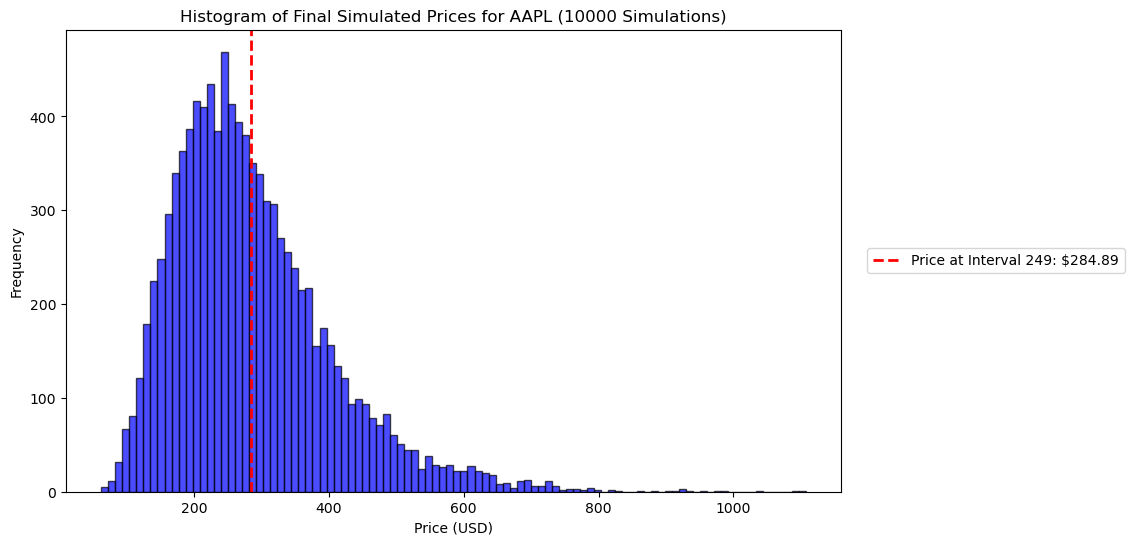


Explanation: The histogram above shows the distribution of final simulated stock prices after the Monte Carlo simulation. The red dashed line highlights the average stock price at the user-chosen interval 249, which is approximately $284.89. This line represents the average of the simulated prices at the selected time point, but individual simulations may vary significantly above or below this value. The histogram provides a sense of the range of possible stock prices.
Expected Investment Value: $12509.38
Worst Case Investment Value: $2720.64

Explanation of Expected and Worst Case Values:
1. **Expected Investment Value**: This is the average value of your investment after the simulated period,
   based on historical trends and Monte Carlo simulations. It represents the typical outcome.
2. **Worst Case Investment Value**: This is the lowest possible value your investment could fall to in the worst-case scenario,
   based on the least favorable Monte Carlo simulations. It shows how muc

In [1]:
#import libraries

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

# Function to retrieve data from yfinance based on user input
def get_stock_data(ticker, start_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date)
    return data

# Function to calculate EV and Equity Value from yfinance
def calculate_metrics_accurate(ticker):
    stock = yf.Ticker(ticker)
    
    # Fetch data from yfinance
    market_cap = stock.info['marketCap']  # Market Cap in USD
    
    # Handling possible missing or alternative field names for 'Cash' and 'Total Debt'
    balance_sheet = stock.balance_sheet
    
    # Look for common variations of Cash
    cash_labels = ['Cash', 'Cash and Cash Equivalents', 'Cash & Equivalents']
    for label in cash_labels:
        if label in balance_sheet.index:
            cash = balance_sheet.loc[label][-1]
            break
    else:
        cash = 0  # Default if no cash label is found
    
    # Look for common variations of Total Debt
    debt_labels = ['Total Debt', 'Long Term Debt', 'Short Term Debt', 'Total Liabilities']
    for label in debt_labels:
        if label in balance_sheet.index:
            debt = balance_sheet.loc[label][-1]
            break
    else:
        debt = 0  # Default if no debt label is found
    
    # Calculate Enterprise Value
    ev = market_cap + debt - cash  # Use the most recent values
    
    # Calculate Equity Value
    equity_value = ev - debt
    
    metrics = {
        'Market Cap': market_cap,
        'Total Debt': debt,
        'Cash': cash,
        'Enterprise Value': ev,
        'Equity Value': equity_value
    }
    
    return metrics

def get_price_column(data):
    # Check if 'Adj Close' is in the data, else fallback to 'Close'
    if 'Adj Close' in data.columns:
        return 'Adj Close'
    else:
        return 'Close'  # Fallback to 'Close' if 'Adj Close' is not available

def calculate_eps_and_volatility(data, ticker):
    """
    Calculate dynamic EPS and day-to-day volatility (percentage change with sign) 
    using the actual shares outstanding if available, otherwise fall back to default.
    
    Args:
    - data: DataFrame with stock price data
    - ticker: Stock ticker symbol to retrieve financial info from Yahoo Finance
    
    Returns:
    - DataFrame with EPS and volatility columns added.
    """
    # Fetch stock info using yfinance to get shares outstanding
    stock = yf.Ticker(ticker)
    
    # Try to get the number of shares outstanding dynamically
    try:
        shares_outstanding = stock.info.get('sharesOutstanding', 1_000_000)  # Default to 1 million if unavailable
    except Exception as e:
        print(f"Could not retrieve shares outstanding: {e}")
        shares_outstanding = 1_000_000  # Fallback to default value
    
    # Get the appropriate price column
    price_column = get_price_column(data)
    
    # Calculate EPS using the actual or default number of shares outstanding
    data['EPS'] = data[price_column] / shares_outstanding
    
    # Calculate day-to-day volatility as a percentage change
    data['Volatility'] = data[price_column].pct_change() * 100  # Daily percentage change in price
    data['Volatility'] = data['Volatility'].round(2)  # Round to 2 decimal places
    
    return data

# Function to calculate backtesting, min/max returns, and standard deviation
def calculate_backtesting_and_stats(data, investment_amount):
    price_column = get_price_column(data)

    # Calculate daily returns
    data['Daily Return'] = data[price_column].pct_change() * 100  # Daily return in percentage

    # Cumulative returns for backtesting
    data['Cumulative Return'] = (1 + data[price_column].pct_change()).cumprod() - 1  # Cumulative return

    # Calculate statistics
    max_gain = data['Daily Return'].max()
    max_loss = data['Daily Return'].min()
    std_dev = data['Daily Return'].std()

    # Calculate cumulative return over the whole period
    cumulative_return = data['Cumulative Return'].iloc[-1] * 100

    # Calculate daily value change based on investment amount
    data['Daily Value Change'] = (data['Daily Return'] / 100) * investment_amount

    # Maximum gain and loss in monetary terms
    max_value_gain = data['Daily Value Change'].max()
    max_value_loss = data['Daily Value Change'].min()

    # Calculate fifth worst loss
    sorted_losses = data['Daily Value Change'].sort_values()
    fifth_worst_loss = sorted_losses.iloc[4]  # Fifth worst loss

    # Store statistics in a dictionary
    stats = {
        'Maximum Gain (%)': max_gain,
        'Maximum Loss (%)': max_loss,
        'Standard Deviation (%)': std_dev,
        'Cumulative Return (%)': cumulative_return,
        'Max Gain (Monetary)': max_value_gain,
        'Max Loss (Monetary)': max_value_loss,
        'Fifth Worst Loss (Monetary)': fifth_worst_loss
    }

    return data, stats

# Function to plot EPS, adjusted closing price, and daily value change based on investment
def plot_data_with_explanation(data, ticker, investment_amount):
    price_column = get_price_column(data)
    
    # Get the latest price
    latest_price = data[price_column].iloc[-1]
    
    # Plot Adjusted Close Price or Close Price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[price_column], label=f'{price_column} Price')
    
    # Add the dashed horizontal line for the latest price
    plt.axhline(y=latest_price, color='red', linestyle='--', linewidth=2, label=f'Latest Price: {latest_price:.2f}')
    
    plt.title(f'{ticker} - {price_column} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()
    
    # Explanation
    print(f"\nExplanation: The chart above shows the {price_column} price of {ticker} over time. "
          f"It provides a historical view of the stock's price movement adjusted for corporate actions like dividends and splits "
          f"if the 'Adj Close' is used. The dashed line represents the latest price of {latest_price:.2f} USD.")

    # Plot Cumulative Return
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return', color='green')
    plt.title(f'{ticker} - Cumulative Return Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()
    
    # Explanation
    print("\nExplanation: The cumulative return shows how much a stock has gained or lost over the entire period "
          "starting from the first trading day in the dataset. A positive value indicates growth in the stock, "
          "while a negative value indicates a loss over the selected period.")

    # Plot Volatility in %
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volatility'], label='Volatility (%)', color='red')
    plt.title(f'{ticker} - Day-to-Day Volatility (%)')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    
    # Calculate and plot the fifth worst volatility
    sorted_volatility = data['Volatility'].sort_values()
    fifth_worst_volatility = sorted_volatility.iloc[4]  # Fifth worst volatility

    plt.axhline(fifth_worst_volatility, color='blue', linestyle='dashed', linewidth=2, label=f'5th Worst Volatility ({fifth_worst_volatility:.2f}%)')

    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()
    
    # Explanation of volatility and 5th worst value
    print(f"\nExplanation: The chart above shows the day-to-day percentage volatility of {ticker}. "
          f"The blue dashed line highlights the 5th worst volatility during the period, which is {fifth_worst_volatility:.2f}%. "
          "This helps investors assess the worst volatility (percentage change) experienced on one of the worst days.")

    # Plot Daily Value Changes based on Investment Amount
    data['Daily Value Change'] = (data['Volatility'] / 100) * investment_amount  # Daily value change based on investment
    
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Daily Value Change'], label=f'Daily Value Change (Investment ${investment_amount})', color='grey')
    plt.title(f'{ticker} - Daily Value Change (Based on ${investment_amount} Investment)')
    plt.xlabel('Date')
    plt.ylabel('Daily Value Change (USD)')
        
    # Calculate and plot the fifth worst value change (monetary)
    sorted_value_changes = data['Daily Value Change'].sort_values()
    fifth_worst_value_change = sorted_value_changes.iloc[4]  # Fifth worst value change

    plt.axhline(fifth_worst_value_change, color='blue', linestyle='dashed', linewidth=2, label=f'5th Worst Value Change (${fifth_worst_value_change:.2f})')

    plt.legend(loc='center', bbox_to_anchor=(1.25, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()
    
    # Explanation with more details on fifth worst value in monetary terms
    print(f"\nExplanation: The chart above shows the day-to-day value change of {ticker} based on an investment of ${investment_amount}. "
          f"The blue dashed line indicates the 5th worst value change during the period, which is ${fifth_worst_value_change:.2f}. "
          "This is related to the concept of Value at Risk (VaR). VaR is a measure of how much value you could potentially lose "
          "on your investment in the worst-case scenario on a given day. In this case, the 5th worst value change means that there "
          "is a low probability (approximately 2% of the days in the dataset) that the investment could lose more than this amount in a single day."
          "\n\nIn other words, this measure tells you that on the 5th worst day, the investment lost around "
          f"${fifth_worst_value_change}. This is useful for understanding risk in terms of potential losses "
          "and how much you could lose on particularly bad days in the stock market.")

    # VaR Analysis with Histogram
    returns = data['Volatility'].dropna()  # Dropping NaN values for volatility

    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=30, color='blue', edgecolor='black', alpha=0.7)

    # Calculate and show VaR at different confidence levels
    percentiles = [10, 5, 1]  # VaR at 90%, 95%, and 99% confidence intervals
    for p in percentiles:
        var_value = np.percentile(returns, p)
        confidence = (100 - p) / 100
        plt.axvline(var_value, color='red', linestyle='dashed', linewidth=2)
        plt.text(var_value, plt.ylim()[1]*0.8, f'VaR {confidence:.0%}', color='red')

    plt.title(f'{ticker} - Volatility Distribution with VaR (90%, 95%, 99%)')
    plt.xlabel('Volatility (%)')
    plt.ylabel('Frequency')
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()
    
    # Explanation for VaR histogram
    print(f"\nExplanation: The histogram represents the distribution of day-to-day volatility for {ticker}. "
          "The red dashed lines indicate the Value at Risk (VaR) levels at 90%, 95%, and 99% confidence intervals. "
          "For example, at the 99% confidence level, there is a 1% chance the stock will experience a day with volatility worse than the corresponding VaR level.")

# Monte Carlo simulation for future stock prices with explanations and histogram, highlighting user-chosen interval
def monte_carlo_simulation(data, t_intervals, simulations, highlight_interval):
    price_column = get_price_column(data)

    log_returns = np.log(1 + data[price_column].pct_change())
    
    mean = log_returns.mean()
    variance = log_returns.var()
    std = log_returns.std()

    # Simulate future daily returns
    daily_logreturns_simulated = std * norm.ppf(np.random.rand(t_intervals, simulations))
    drift = mean - (0.5 * variance)
    daily_logreturns_simulated_with_drift = daily_logreturns_simulated + drift
    daily_simplereturns_simulated_with_drift = np.exp(daily_logreturns_simulated_with_drift)

    # Latest known stock price
    last_price = data[price_column].iloc[-1]

    # Prepare an array for the price simulations
    price_list = np.zeros_like(daily_simplereturns_simulated_with_drift)
    price_list[0] = last_price

    # Apply a for loop for simulated prices
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_simplereturns_simulated_with_drift[t]

    # Plot simulated future prices
    plt.figure(figsize=(10, 6))
    plt.plot(price_list)
    plt.title(f"Monte Carlo Simulation - {simulations} Simulations over {t_intervals} Days")
    plt.xlabel("Day")
    plt.ylabel("Price (USD)")
    plt.grid(False)
    plt.show()

    # Calculate worst, avg, and best scenarios
    worst_sim = round(price_list[-1].min(), 2)
    avg_sim = round(price_list[-1].mean(), 2)
    best_sim = round(price_list[-1].max(), 2)
    
    
        # Create an array to hold the simulated price paths
    simulation_results = np.zeros((t_intervals, simulations))

    for sim in range(simulations):
        price_series = [last_price]
        for t in range(1, t_intervals):
            # Simulate price changes using a random normal variable
            price_change = price_series[-1] * (1 + np.random.normal(mean, variance))
            price_series.append(price_change)
        simulation_results[:, sim] = price_series
    
    # Calculate and display expected returns based on simulations
    ending_prices = simulation_results[-1]
    expected_return = (ending_prices.mean() - last_price) / last_price * 100
    
    # Display the results
    print(f"Worst Simulation $/share: {worst_sim}")
    print(f"Avg Simulation $/share: {avg_sim}")
    print(f"Best Simulation $/share: {best_sim}")
         
    # Display the expected return
    print(f"\nExpected Return after {t_intervals} days: {expected_return:.2f}%")
      
    # Explanation
    print("\nExplanation: The Monte Carlo simulation estimates potential future stock prices based on historical log returns. "
          f"The worst, average, and best simulated outcomes are displayed to give an idea of the possible range of stock prices for {ticker} after {t_intervals} days.")
    
    # Set up confidence intervals
    mean_day250_prices = price_list[-1].mean()
    sd_day250_prices = price_list[-1].std()
    upper_interval_1sd = mean_day250_prices + 1 * sd_day250_prices
    lower_interval_1sd = mean_day250_prices - 1 * sd_day250_prices
    upper_interval_2sd = mean_day250_prices + 2 * sd_day250_prices
    lower_interval_2sd = mean_day250_prices - 2 * sd_day250_prices

    print("\nConfidence Intervals")
    print(f"1 Sigma (1 S.D): 68% confident that price after {t_intervals} days will fall between: ${lower_interval_1sd:.2f} and ${upper_interval_1sd:.2f}")
    print(f"2 Sigma (2 S.D): 95% confident that price after {t_intervals} days will fall between: ${lower_interval_2sd:.2f} and ${upper_interval_2sd:.2f}")

    # Explanation of confidence intervals
    print("\nExplanation: The confidence intervals (1 and 2 standard deviations) indicate the range within which we expect "
          "the stock price to fall with 68% and 95% confidence, respectively. These intervals help gauge the risk of price changes.")

    # Plot histogram of final prices from all simulations
    plt.figure(figsize=(10, 6))
    plt.hist(price_list[-1], bins=100, color='blue', edgecolor='black', alpha=0.7)
    
    # Highlight the user-chosen interval
    chosen_price = price_list[highlight_interval].mean()
    plt.axvline(chosen_price, color='red', linestyle='dashed', linewidth=2, label=f'Price at Interval {highlight_interval}: ${chosen_price:.2f}')
    
    plt.title(f'Histogram of Final Simulated Prices for {ticker} ({simulations} Simulations)')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    plt.grid(False)
    plt.show()

# Explanation of histogram and the red dashed line
    print(f"\nExplanation: The histogram above shows the distribution of final simulated stock prices after the Monte Carlo simulation. "
          f"The red dashed line highlights the average stock price at the user-chosen interval {highlight_interval}, "
          f"which is approximately ${chosen_price:.2f}. This line represents the average of the simulated prices at the selected time point, "
          "but individual simulations may vary significantly above or below this value. The histogram provides a sense of the range of possible stock prices.")

       # Calculate expected investment value and worst-case investment value
    expected_value = (expected_return / 100) * investment_amount + investment_amount
    worst_case_value = (worst_sim - last_price) / last_price * investment_amount + investment_amount

    print(f"Expected Investment Value: ${expected_value:.2f}")
    print(f"Worst Case Investment Value: ${worst_case_value:.2f}")

    # Explanation of the values
    print("\nExplanation of Expected and Worst Case Values:")
    print("1. **Expected Investment Value**: This is the average value of your investment after the simulated period,")
    print("   based on historical trends and Monte Carlo simulations. It represents the typical outcome.")
    print("2. **Worst Case Investment Value**: This is the lowest possible value your investment could fall to in the worst-case scenario,")
    print("   based on the least favorable Monte Carlo simulations. It shows how much you might lose if the stock performs poorly.")
    print("   However, this does not mean you lose the entire investment, but this would be the value in the worst-case situation.")

# Function to fetch key financial metrics using yfinance

def fetch_financial_metrics(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    
    # Retrieve key financial metrics from the info dictionary
    market_cap = info.get('marketCap', 'N/A')  # Market Cap
    enterprise_value = info.get('enterpriseValue', 'N/A')  # Enterprise Value
    trailing_pe = info.get('trailingPE', 'N/A')  # Trailing P/E Ratio
    forward_pe = info.get('forwardPE', 'N/A')  # Forward P/E Ratio
    peg_ratio = info.get('pegRatio', 'N/A')  # PEG Ratio (5-Year Expected)
    price_to_sales = info.get('priceToSalesTrailing12Months', 'N/A')  # Price to Sales
    price_to_book = info.get('priceToBook', 'N/A')  # Price to Book
    ev_to_revenue = info.get('enterpriseToRevenue', 'N/A')  # Enterprise Value/Revenue
    ev_to_ebitda = info.get('enterpriseToEbitda', 'N/A')  # Enterprise Value/EBITDA
    
    # Retrieve Debt and Cash if available
    total_debt = info.get('totalDebt', 'N/A')  # Total Debt
    cash = info.get('totalCash', 'N/A')  # Cash

    # Calculate Equity Value as Enterprise Value minus Debt (if available)
    if total_debt != 'N/A' and enterprise_value != 'N/A':
        equity_value = enterprise_value - total_debt
    else:
        equity_value = 'N/A'
    
    # Formatting helper to add commas and two decimals
    def format_value(val):
        return f"{val:,.2f}" if isinstance(val, (int, float)) else val

    # Print the key metrics with descriptions and formatting
    print("\n------------------- Key Financial Metrics -------------------\n")
    print(f"{'Metric':<25}{'Value':<25}{'Description'}")
    print("-" * 75)
    print(f"{'Market Cap':<25}{format_value(market_cap):<25}{'Total market value of a company’s outstanding shares'}")
    print(f"{'Enterprise Value':<25}{format_value(enterprise_value):<25}{'Company value including debt and excluding cash'}")
    print(f"{'Trailing P/E':<25}{format_value(trailing_pe):<25}{'Price-to-Earnings ratio based on past 12 months earnings'}")
    print(f"{'Forward P/E':<25}{format_value(forward_pe):<25}{'Price-to-Earnings ratio based on future earnings estimates'}")
    print(f"{'PEG Ratio':<25}{format_value(peg_ratio):<25}{'P/E ratio divided by expected earnings growth rate'}")
    print(f"{'Price to Sales':<25}{format_value(price_to_sales):<25}{'Market capitalization divided by total sales (TTM)'}")
    print(f"{'Price to Book':<25}{format_value(price_to_book):<25}{'Stock price divided by book value per share'}")
    print(f"{'EV to Revenue':<25}{format_value(ev_to_revenue):<25}{'Enterprise Value divided by revenue'}")
    print(f"{'EV to EBITDA':<25}{format_value(ev_to_ebitda):<25}{'Enterprise Value divided by EBITDA (earnings before interest, taxes, depreciation, and amortization)'}")
    print(f"{'Total Debt':<25}{format_value(total_debt):<25}{'Total debt a company owes'}")
    print(f"{'Cash':<25}{format_value(cash):<25}{'Total cash on hand for the company'}")
    print(f"{'Equity Value':<25}{format_value(equity_value):<25}{'Company’s value excluding debt (Enterprise Value - Debt)'}")
    print("\n--------------------------------------------------------------\n")
 

 # Function to display the volume of shares based on the investment amount and current stock price
def display_shares_volume(investment_amount, data):
    price_column = get_price_column(data)
    latest_price = data[price_column].iloc[-1]
    
    # Calculate the volume of shares
    shares_volume = investment_amount / latest_price
    
    print(f"\nInvestment Amount: ${investment_amount}")
    print(f"Latest Stock Price: ${latest_price:.2f}")
    print(f"Volume of Shares You Can Hold: {shares_volume:.2f} shares\n")    

    
# Main function to run the complete analysis, including Monte Carlo simulation
def run_analysis(ticker, start_date, investment_amount, t_intervals=250, simulations=10000):
    # Step 1: Retrieve data
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date)
    
    # Step 2: Display the volume of shares based on the investment amount
    display_shares_volume(investment_amount, data) 
    
    # Fetch the company name (longName)
    try:
        stock_name = stock.info['longName']
    except KeyError:
        stock_name = ticker  # Fallback to the ticker symbol if the name is not available

    # Set a fixed width for the layout (e.g., 80 characters wide)
    layout_width = 80

    # Create the centered name text with dashes above and below
    centered_name = f"{stock_name} ({ticker})".center(layout_width)
    dashed_line = '-' * layout_width
    
    # Print the dashed lines and centered stock name in bold
    print(f"\n{dashed_line}")
    print(f"\033[1m{centered_name}\033[0m")
    print(f"{dashed_line}\n")
    
    
    # Step 3: Fetch financial metrics
    fetch_financial_metrics(ticker)
    
    # Step 5: Calculate EPS and Volatility
    data_eps = calculate_eps_and_volatility(data, ticker)
    
    # Step 6: Calculate backtesting and performance statistics with investment amount
    data_backtest, stats = calculate_backtesting_and_stats(data_eps, investment_amount)
    
    # Step 11: Original EPS, Volatility, and Daily Value Change Plots (Unchanged)
    plot_data_with_explanation(data_backtest, ticker, investment_amount)

    # Step 4: Calculate technical indicators (SMA, EMA, Bollinger Bands, RSI)
    price_column = get_price_column(data)

    # Calculate Simple Moving Average (SMA)
    data['SMA_20'] = data[price_column].rolling(window=20).mean()
    data['SMA_50'] = data[price_column].rolling(window=50).mean()

    # Calculate Exponential Moving Average (EMA)
    data['EMA_20'] = data[price_column].ewm(span=20, adjust=False).mean()
    data['EMA_50'] = data[price_column].ewm(span=50, adjust=False).mean()

    # Calculate Bollinger Bands (20-day SMA ± 2 standard deviations)
    data['BB_Upper'] = data['SMA_20'] + 2 * data[price_column].rolling(window=20).std()
    data['BB_Lower'] = data['SMA_20'] - 2 * data[price_column].rolling(window=20).std()

    # Calculate Relative Strength Index (RSI)
    delta = data[price_column].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # Step 8: New Plot - Technical Indicators (SMA, EMA, Bollinger Bands)
    plt.figure(figsize=(12, 8))

    # Plot price
    plt.plot(data.index, data[price_column], label=f'{price_column} Price', color='black')

    # Plot SMA and EMA
    plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue', linestyle='--')
    plt.plot(data.index, data['SMA_50'], label='SMA 50', color='orange', linestyle='--')
    plt.plot(data.index, data['EMA_20'], label='EMA 20', color='green', linestyle='-.')
    plt.plot(data.index, data['EMA_50'], label='EMA 50', color='red', linestyle='-.')

    # Plot Bollinger Bands
    plt.plot(data.index, data['BB_Upper'], label='Bollinger Upper Band', color='purple', linestyle=':')
    plt.plot(data.index, data['BB_Lower'], label='Bollinger Lower Band', color='purple', linestyle=':')

    # Highlight the latest price
    latest_price = data[price_column].iloc[-1]
    plt.axhline(y=latest_price, color='red', linestyle='--', linewidth=2, label=f'Latest Price: {latest_price:.2f}')

    plt.title(f'{ticker} - Technical Indicators (SMA, EMA, Bollinger Bands)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))  # Move legend outside the plot
    plt.grid(False)
    plt.show()

    # Explanation for SMA, EMA, and Bollinger Bands:
    print(f"\nExplanation: The chart above shows key technical indicators for {ticker}.")
    print("1. **Simple Moving Averages (SMA)**: The 20-day and 50-day SMAs smooth out price fluctuations and help reveal trends.")
    print("   - If the 20-day SMA crosses above the 50-day SMA, it signals potential upward momentum.")
    print("   - If the 20-day SMA crosses below the 50-day SMA, it indicates potential downward momentum.")
    print("2. **Exponential Moving Averages (EMA)**: The EMA is more responsive to recent price changes.")
    print("   - A rising EMA indicates that recent prices are trending higher.")
    print("3. **Bollinger Bands**: These show volatility by plotting two standard deviations above and below the 20-day SMA.")
    print("   - When the price touches the upper band, it might indicate that the stock is overbought, meaning it may fall.")
    print("   - When the price touches the lower band, it might indicate the stock is oversold, suggesting it may rise.\n")

    # Step 9: Plot RSI
    plt.figure(figsize=(12, 4))
    plt.plot(data.index, data['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{ticker} - Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))  # Move legend outside the plot
    plt.grid(False)
    plt.show()
    
    # Explanation for RSI:
    print(f"\nExplanation: The Relative Strength Index (RSI) is a momentum indicator used to identify overbought and oversold conditions for {ticker}.")
    print("1. **RSI above 70**: This indicates that the stock might be overbought, meaning that it has risen too quickly and may be due for a correction.")
    print("2. **RSI below 30**: This suggests the stock might be oversold, meaning it has dropped too much and could bounce back soon.\n")

    # Step 10: Monte Carlo Simulation & VaR Plot (Unchanged)
    highlight_interval = int(input(f"Enter the interval number to highlight (between 0 and {t_intervals - 1}): ").strip())
    print("\nRunning Monte Carlo simulation...\n")
    monte_carlo_simulation(data, t_intervals, simulations, highlight_interval)    

#Prompt user for ticker and start date
ticker = input("Enter the ticker symbol (e.g., AAPL): ").strip().upper()
start_date_str = input("Enter the start date (mm/dd/yyyy): ").strip()
start_date = datetime.strptime(start_date_str, "%m/%d/%Y")
investment_amount = float(input("Enter the investment amount (e.g., 10000): ").strip())

# Prompt user for Monte Carlo parameters
t_intervals = int(input("Enter the number of time intervals (days) for Monte Carlo simulation: ").strip())
simulations = int(input("Enter the number of simulations for Monte Carlo simulation: ").strip())

# Run the analysis
run_analysis(ticker, start_date, investment_amount, t_intervals=t_intervals, simulations=simulations)